In [58]:
# importing dependecies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [59]:
# load dataset
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
# get dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
# checking the number of rows and columns of the dataset
data.shape

(891, 12)

In [62]:
# checking if there are null values in the dataset
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
# importing simple imputer to handle the missing values
from sklearn.impute import SimpleImputer

In [64]:
# applying simple imputer in Age column
imputer = SimpleImputer(strategy='mean')

data['Age'] = imputer.fit_transform(data[['Age']])

In [39]:
# checking null values in Embarked column
data['Embarked'].isnull().sum()

np.int64(2)

In [40]:
# dropping useless column
data = data.drop(['Cabin'], axis=1)

In [41]:
# checking if the modification was applied
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [42]:
# feature engineering creating Family column
data['family'] = data['SibSp'] + data['Parch']
data['family']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: family, Length: 891, dtype: int64

In [43]:
# checking the modifications
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [44]:
# importing the module Label Encoder to transform the data in numbers

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# applying the encoder in the columns
data['Sex'] = encoder.fit_transform(data[['Sex']]).ravel()
data['Embarked'] = encoder.fit_transform(data[['Embarked']]).ravel()

# checking the modifications
data.head()

c:\Users\adams\Desktop\machine_learning\portfolio_machine_learning\titanic_survival_logistic_regression\env\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\adams\Desktop\machine_learning\portfolio_machine_learning\titanic_survival_logistic_regression\env\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,0


In [45]:
# dropping useless columns
data = data.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,1,22.0,7.2500,2,1
1,1,1,0,38.0,71.2833,0,1
2,1,3,0,26.0,7.9250,2,0
3,1,1,0,35.0,53.1000,2,1
4,0,3,1,35.0,8.0500,2,0


In [46]:
#checking the values for Embarked column
data['Embarked'].value_counts()

Embarked
2    644
0    168
1     77
3      2
Name: count, dtype: int64

In [47]:
# splitting the dataset in feature and target
X = data.drop(['Survived'], axis=1)
y = data['Survived']

In [48]:
# checking if the target column is balanced
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [49]:
# splitting the data in train and test samples
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [51]:
# importing the model
from sklearn.linear_model import LogisticRegression

In [52]:
# fitting and predicting train dataset
model = LogisticRegression()

model.fit(X_train, y_train)

pred = model.predict(X_train)



In [53]:
# importing metrics
from sklearn.metrics import classification_report

In [54]:
# implementing metrics for train data
acc = classification_report(y_train, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       439
           1       0.75      0.71      0.73       273

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712



In [55]:
# predicting test dataset
pred_test = model.predict(X_test)
#applying metrics for test dataset
acc_test = classification_report(y_test, pred_test)
print(acc_test)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



In [56]:
# set a correlation variable
corr = data.corr()

<Axes: >

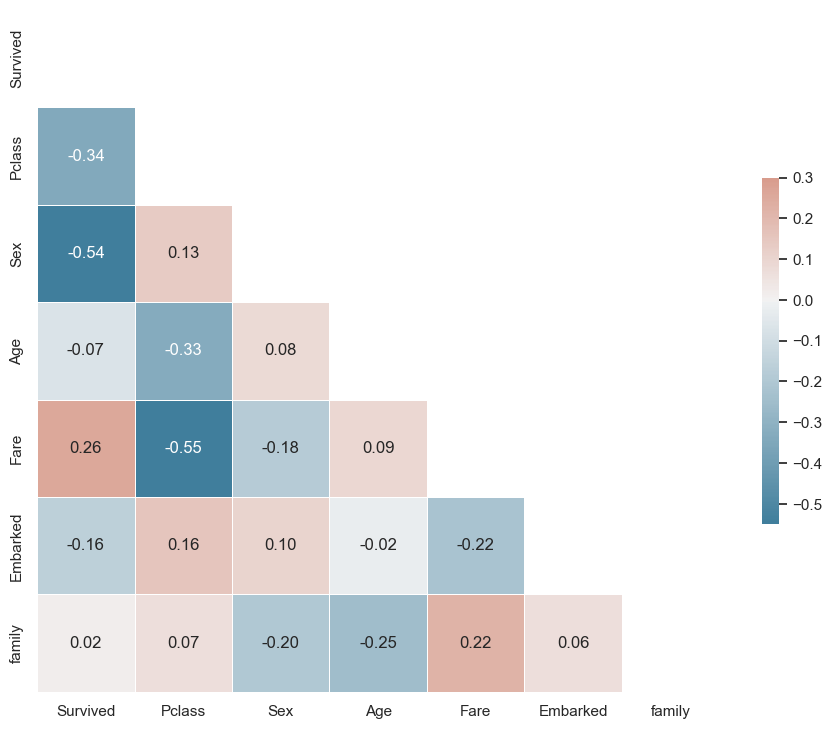

In [57]:
# plotting a correlation graph
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, fmt='.2f', annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: xlabel='Sex', ylabel='count'>

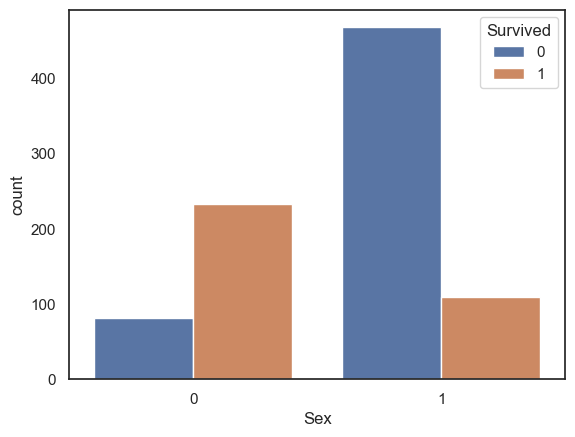

In [31]:
#  plotting the number of survival and the sex
sns.countplot(x='Sex', data=data, hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

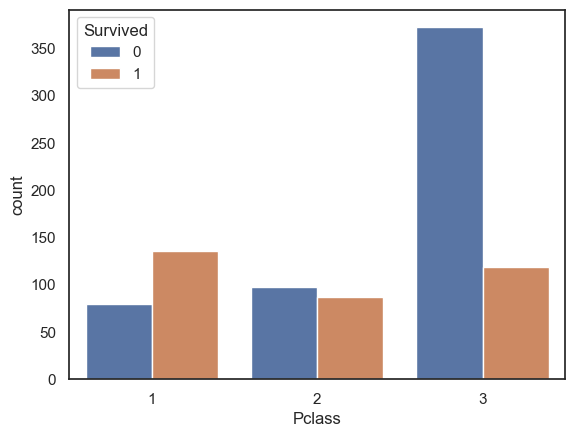

In [32]:
#  plotting survival in each cabin class

sns.countplot(x='Pclass', data=data, hue='Survived')

<Axes: xlabel='family', ylabel='count'>

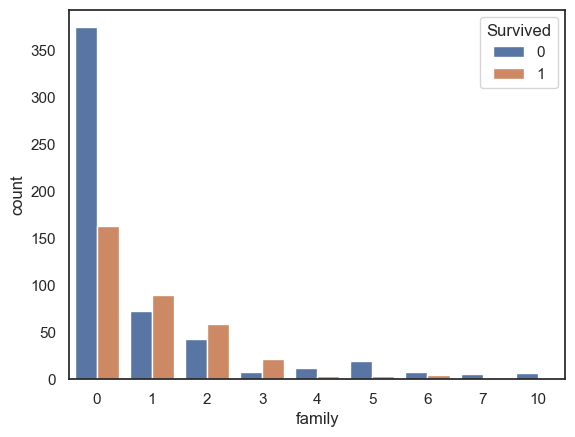

In [33]:
#  plotting the survival accoring the number of family people on board

sns.countplot(x='family', data=data, hue='Survived')